# 018 Linear Algebra BUG HUNT

In [58]:
import numpy as np
import sympy as sym 
from IPython.display import display, Math
import matplotlib.pyplot as plt

In [59]:
# 1.)
# create a column vector
cv = np.array([ [-2], [3] ])

display(Math(sym.latex(sym.sympify(cv))))

<IPython.core.display.Math object>

[-1.4  1.4]


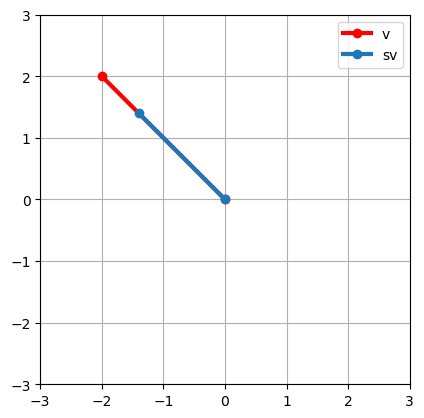

In [60]:
# 2.)
# visualize scalar-vector multiplication

v = np.array([-2,2])
s = .7

sv = s*v
print(sv)
plt.plot([0,v[0]],[0,v[1]],'ro-',linewidth=3,label='v')
plt.plot([0,sv[0]],[0,sv[1]],'o-',linewidth=3,label='sv')
    
plt.axis('square')
plt.legend()
plt.axis([-3,3,-3,3])
plt.grid()
plt.show()

In [61]:
# 3.)
# algorithm to compute the dot product
v = np.random.randn(7)
w = np.random.randn(7)

dp1 = 0
for i in range(0,len(v)):
    dp1 += v[i]*w[i]

dp2 = np.dot(v,w)

print(str(dp1) + '\t' + str(dp2))

-2.886581083756896	-2.8865810837568966


In [62]:
# 4.)
# number of data points
n = 10

# data
data1 = np.arange(0,n) + np.random.randn(n)
data2 = np.arange(0,n) + np.random.randn(n)

# mean-center
data1 -= np.mean(data1)
data2 -= np.mean(data2)

# compute correlation
numer = np.dot(data1,data2)
denom = np.sqrt( np.dot(data1,data1) ) * np.sqrt(np.dot(data2,data2))
r1 = numer/denom

# confirm with numpy function
r2 = np.corrcoef(data1,data2)[1][0]

print(r1)
print(r2)

0.9080000683691597
0.9080000683691598


In [63]:
# 5.)
# outer product computation
o1 = np.random.randint(0,10,7)
o2 = np.random.randint(0,10,4)

outermat = np.zeros((len(o1),len(o2)))

for i in range(len(o1)):
    outermat[i,:] = o1[i]*o2
    
print(outermat-np.outer(o1,o2))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [64]:
# 6.)
# matrix multiplication
A = np.random.randn(5,5)
I = np.eye(5)

print(A)
print(' ')
print(A@I)

[[-2.12954292 -0.72708914  0.11104216 -1.14437612  1.30106184]
 [-1.32484149  1.13973885  0.96894021 -1.01406189  0.23844379]
 [ 0.38501319  0.26503805 -1.61529924  0.20267311 -0.98072852]
 [-0.31257341 -1.29455257  1.16006228  0.45439287  0.87399107]
 [-2.07537662  0.37746816  0.35520871  1.05569001 -0.20380027]]
 
[[-2.12954292 -0.72708914  0.11104216 -1.14437612  1.30106184]
 [-1.32484149  1.13973885  0.96894021 -1.01406189  0.23844379]
 [ 0.38501319  0.26503805 -1.61529924  0.20267311 -0.98072852]
 [-0.31257341 -1.29455257  1.16006228  0.45439287  0.87399107]
 [-2.07537662  0.37746816  0.35520871  1.05569001 -0.20380027]]


In [65]:
# 7.)
# matrix multiplication
A = np.random.randn(8,5)
I = np.eye(5)

print(A)
print(' ')
print(A@I)

[[-0.33767081  0.21104064 -0.5631703   1.00023716  0.42461454]
 [-1.87741682  1.10464867 -2.304951    0.00329481 -2.09610399]
 [ 0.36468586  1.04503193 -0.92508674  1.18025192  0.48133461]
 [ 0.34386584 -0.61673416 -1.01840115 -1.70946159  1.48028686]
 [-0.27548121  0.25943237  0.59378372 -0.46962296 -0.14871239]
 [ 0.53394944  0.02378379 -0.27234249 -0.25640764 -0.8570719 ]
 [ 0.28684122 -1.44509272  0.67296093  1.12624454  2.00366317]
 [ 0.12622748 -1.56408124 -0.30111976  0.67249952  0.72658002]]
 
[[-0.33767081  0.21104064 -0.5631703   1.00023716  0.42461454]
 [-1.87741682  1.10464867 -2.304951    0.00329481 -2.09610399]
 [ 0.36468586  1.04503193 -0.92508674  1.18025192  0.48133461]
 [ 0.34386584 -0.61673416 -1.01840115 -1.70946159  1.48028686]
 [-0.27548121  0.25943237  0.59378372 -0.46962296 -0.14871239]
 [ 0.53394944  0.02378379 -0.27234249 -0.25640764 -0.8570719 ]
 [ 0.28684122 -1.44509272  0.67296093  1.12624454  2.00366317]
 [ 0.12622748 -1.56408124 -0.30111976  0.67249952  0

In [66]:
# 8.)
# random matrices are invertible
A = np.random.randint(-5,6,(5,5))
Ainv = np.linalg.inv(A)

np.round(A@Ainv,4)

array([[ 1.,  0., -0., -0.,  0.],
       [ 0.,  1., -0.,  0., -0.],
       [-0.,  0.,  1.,  0.,  0.],
       [ 0.,  0., -0.,  1.,  0.],
       [-0., -0.,  0.,  0.,  1.]])

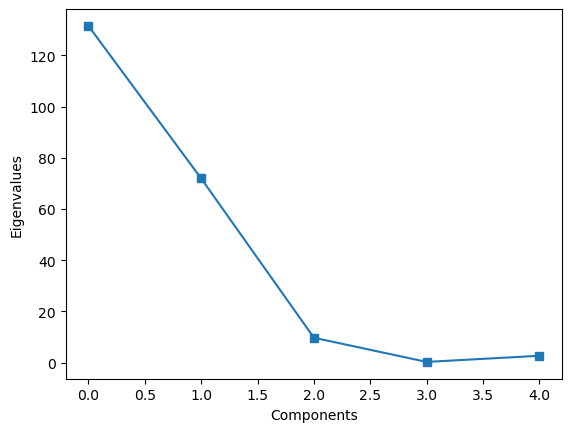

In [67]:
# 9.)
# plot the eigenspectrum
# the matrix
M = np.random.randint(-5,5,(5,5))
M = M@M.T

# its eigendecomposition
eigvals,eigvecs = np.linalg.eig(M)

plt.plot(np.matrix.flatten(eigvals),'s-')
plt.xlabel('Components')
plt.ylabel('Eigenvalues')

plt.show()


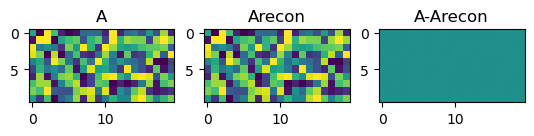

In [68]:
# 10.)
# Reconstruct a matrix based on its SVD
A = np.random.randint(-10,11,(10,20))

U,s,V = np.linalg.svd(A)

# reconstruct S
# S = np.diag(s)
S = np.zeros(np.shape(A))
for i in range(len(s)):
    S[i,i] = s[i]

Arecon = U@S@V

fig,ax = plt.subplots(1,3)

ax[0].imshow(A,vmin=-10,vmax=10)
ax[0].set_title('A')

ax[1].imshow(Arecon,vmin=-10,vmax=10)
ax[1].set_title('Arecon')

ax[2].imshow(A-Arecon,vmin=-10,vmax=10)
ax[2].set_title('A-Arecon')

plt.show()